In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 44.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pmdarima as pm
from pmdarima import auto_arima

In [ ]:
def mean_absolute_percentage_error(actual, prediction):
    actual = pd.Series(actual)
    prediction = pd.Series(prediction)
    return 100 * np.mean(np.abs((actual - prediction))/actual)

In [ ]:
dataset = pd.read_excel('day2_final.xlsx')

In [ ]:
dataset['VOL'][dataset['VOL'] == dataset['VOL'].max()] = np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset=dataset.fillna(method='backfill')

In [ ]:
import seaborn as sns

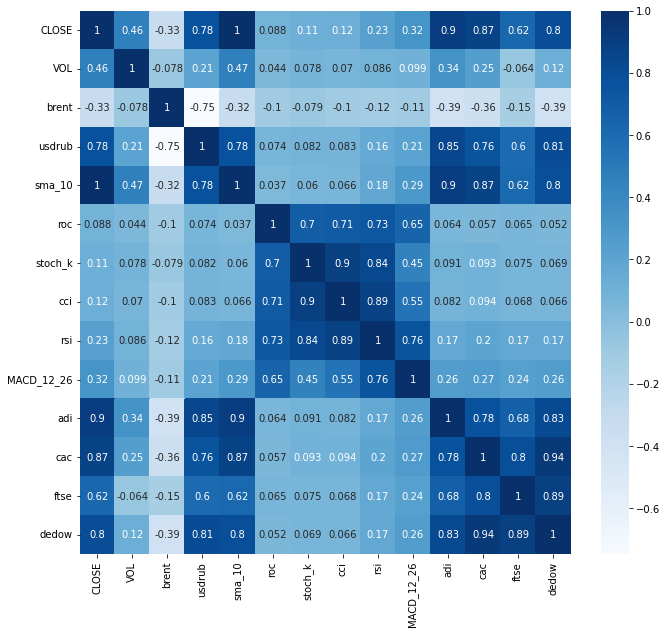

In [ ]:
corrmat = dataset[['CLOSE', 'VOL', 'brent',
       'usdrub', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow']].corr()
  
f, ax = plt.subplots(figsize =(11, 10))
sns.heatmap(corrmat, ax = ax, annot=True, cmap="Blues")

In [ ]:
dataset.columns

Index(['TICKER', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'brent',
       'usdrub', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow'],
      dtype='object')

In [ ]:
X=dataset[['OPEN', 'HIGH', 'LOW', 'VOL', 'brent',
       'usdrub', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow']]
Y=dataset['CLOSE']

In [ ]:
import matplotlib.pyplot as plt

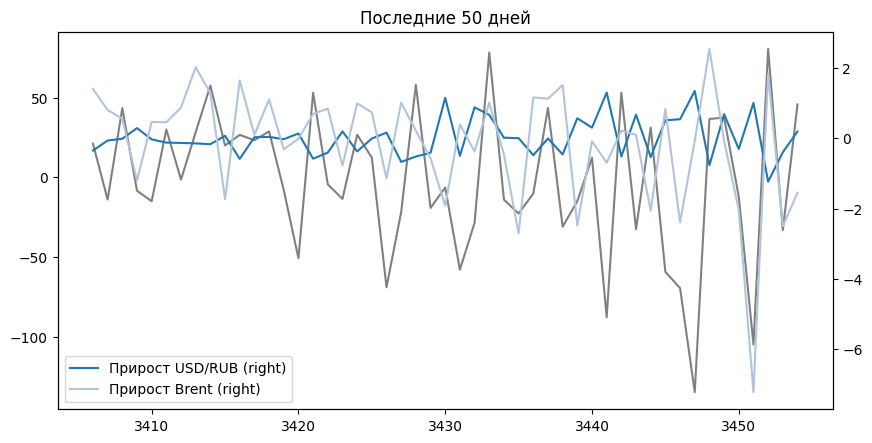

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
dataset['CLOSE'][-50:].diff().plot(label='Прирост MOEX', color = 'gray')
dataset['usdrub'][-50:].diff().plot(label='Прирост USD/RUB', secondary_y=True)
dataset['brent'][-50:].diff().plot(label='Прирост Brent', secondary_y=True, color='lightsteelblue')

# adding Label to the x-axis
plt.xlabel('Периоды')
plt.title('Последние 50 дней')

# adding legend to the curve
plt.legend()

In [ ]:
dataset[['CLOSE', 'brent',
       'usdrub',
       'cac', 'ftse', 'dedow']].describe().round(2)

In [ ]:
dataset[['CLOSE', 'VOL', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi']].describe().round(2)

,CLOSE,VOL,sma_10,roc,stoch_k,cci,rsi,MACD_12_26,adi
count,3455.00,3.455000e+03,3455.00,3455.00,3455.00,3455.00,3455.00,3455.00,3.455000e+03
mean,1928.31,4.538069e+10,1925.16,0.47,56.68,17.46,53.05,4.85,4.633238e+12
std,738.22,2.474547e+10,733.93,5.74,30.45,110.84,11.81,30.81,2.727472e+12
min,513.62,0.000000e+00,573.78,-42.31,0.00,-420.00,12.53,-224.87,-1.073393e+11
25%,1435.78,2.859059e+10,1433.10,-2.09,29.93,-69.55,45.00,-8.44,3.050130e+12
50%,1695.98,3.910782e+10,1693.86,0.68,60.15,31.98,53.27,7.32,4.690733e+12
75%,2302.28,5.656969e+10,2299.90,3.49,84.21,105.26,61.55,21.79,5.787477e+12
max,4287.52,2.490000e+11,4264.31,31.50,100.00,370.12,85.54,87.01,1.159328e+13


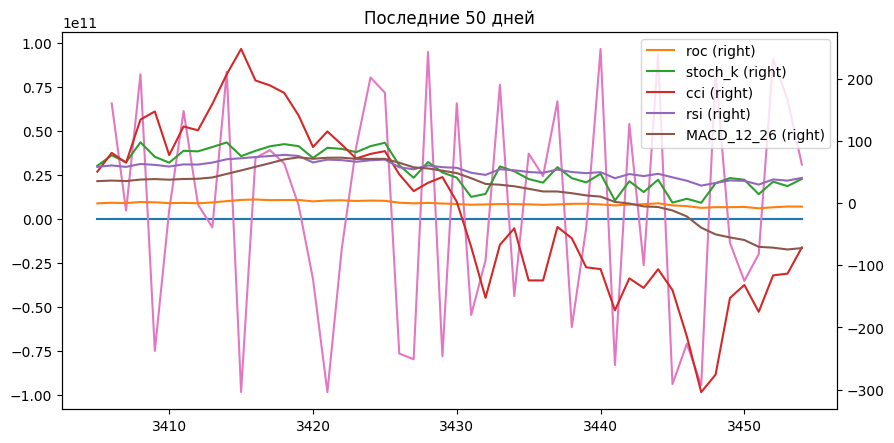

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
dataset['CLOSE'][-50:].diff().plot(label='Прирост MOEX', color = 'gray')
dataset['sma_10'][-50:].plot(label='sma_10')
dataset['roc'][-50:].plot(label='roc', secondary_y=True)
dataset['stoch_k'][-50:].plot(label='stoch_k', secondary_y=True)
dataset['cci'][-50:].plot(label='cci', secondary_y=True)
dataset['rsi'][-50:].plot(label='rsi', secondary_y=True)
dataset['MACD_12_26'][-50:].plot(label='MACD_12_26', secondary_y=True)
dataset['adi'][-50:].diff().plot(label='adi')

# adding Label to the x-axis
plt.xlabel('Периоды')
plt.title('Последние 50 дней')

# adding legend to the curve
plt.legend()

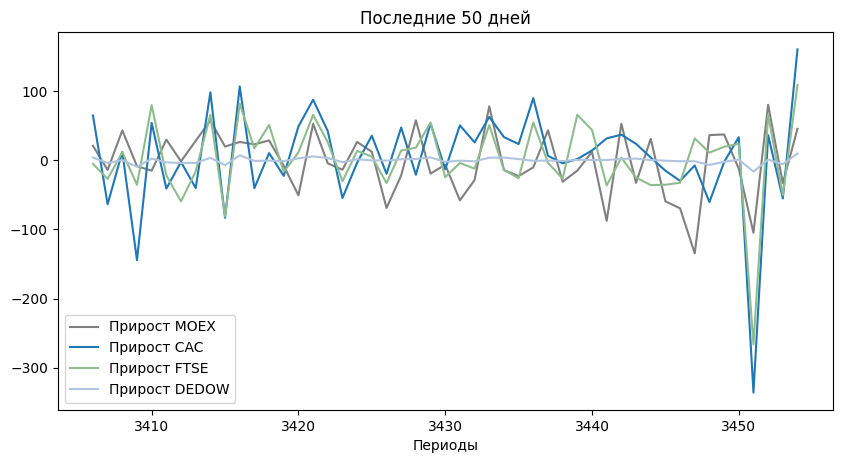

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
dataset['CLOSE'][-50:].diff().plot(label='Прирост MOEX', color = 'gray')
dataset['cac'][-50:].diff().plot(label='Прирост CAC')
dataset['ftse'][-50:].diff().plot(label='Прирост FTSE', color='darkseagreen')
dataset['dedow'][-50:].diff().plot(label='Прирост DEDOW', color='lightsteelblue')

# adding Label to the x-axis
plt.xlabel('Периоды')
plt.title('Последние 50 дней')

# adding legend to the curve
plt.legend()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = False, test_size=0.2)

In [ ]:
Y=dataset['CLOSE']

In [ ]:
Y_train, Y_test = train_test_split(Y, shuffle = False, test_size=0.2)

In [ ]:
model = auto_arima(y=Y_train, X=X_train, d=1, max_p=10, max_q=10, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, random_state=1, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18544.482, Time=7.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18535.614, Time=4.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18533.134, Time=4.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18533.276, Time=6.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37665.891, Time=4.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18534.771, Time=6.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18537.255, Time=6.77 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18541.668, Time=7.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18531.204, Time=4.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18532.839, Time=6.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18535.313, Time=6.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18531.346, Time=6.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18539.733, Time=6.61 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 77.114 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [ ]:
model = pm.ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model.fit(y=Y_train, X=X_train)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
params = model.params()

In [ ]:
params.sort_values(inplace=True)

In [ ]:
params = params.reset_index()

In [ ]:
params = pd.DataFrame(params)#, columns=['Variable','Weight'])

In [ ]:
import matplotlib.patches as patches

In [ ]:
params=params.rename(columns={'index':'Variable', 0:'Weight'})

In [ ]:
params=params[:-1]

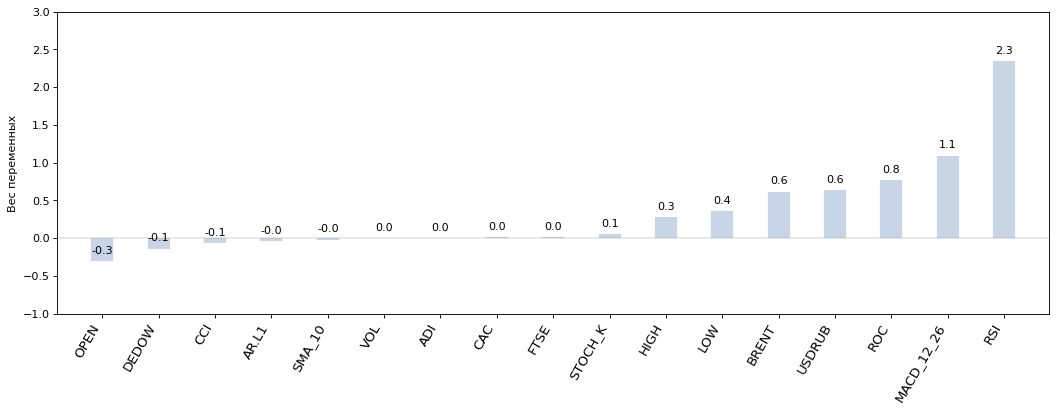

In [ ]:
fig, ax = plt.subplots(figsize=(16,5), facecolor='white', dpi= 80)

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.3)

ax.vlines(x=params.index, ymin=0, ymax=params.Weight, color='lightsteelblue', alpha=0.7, linewidth=20)

# Annotate Text
for i, Weight in enumerate(params.Weight):
    ax.text(i, Weight+0.1, round(Weight, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set(ylabel='Вес переменных', ylim=(-1, 3))
plt.xticks(params.index, params.Variable.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2764
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -9247.602
Date:                Mon, 25 Apr 2022   AIC                          18531.204
Time:                        15:18:36   BIC                          18637.838
Sample:                             0   HQIC                         18569.721
                               - 2764                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
OPEN          -0.3047   1.13e-21  -2.69e+20      0.000      -0.305      -0.305
HIGH           0.2787   2.85e-23   9.77e+21      0.000       0.279       0.279
LOW            0.3590   8.05e-21   4.46e+19      0.000       0.359       0.359
VOL         2.554e-11   5.48e-12      4.663      0.000    1.48e-11    3.63e-11
brent          0.6158   8.63e-23   7.13e+21      0.000       0.616       0.616
usdrub         0.6400   8.62e-23   7.43e+21      0.000       0.640       0.640
sma_10        -0.0201   3.08e-22  -6.52e+19      0.000      -0.020      -0.020
roc            0.7684   1.52e-22   5.04e+21      0.000       0.768       0.768
stoch_k        0.0552    8.3e-22   6.66e+19      0.000       0.055       0.055
cci           -0.0658   1.46e-20   -4.5e+18      0.000      -0.066      -0.066
rsi            2.3457   7.05e-22   3.33e+21      0.000       2.346       2.346
MACD_12_26     1.0931   4.43e-22   2.47e+21      0.000       1.093       1.093
adi         6.368e-11   4.93e-13    129.254      0.000    6.27e-11    6.46e-11
cac            0.0162   1.58e-21   1.03e+19      0.000       0.016       0.016
ftse           0.0188   2.23e-21   8.45e+18      0.000       0.019       0.019
dedow         -0.1373   5.17e-23  -2.66e+21      0.000      -0.137      -0.137
ar.L1         -0.0402   2.02e-22  -1.99e+20      0.000      -0.040      -0.040
sigma2        47.2870   1.62e-23   2.92e+24      0.000      47.287      47.287
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             57287.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.49e+38. Standard errors may be unstable.
"""

In [ ]:
res = model.resid()

In [ ]:
res = pd.DataFrame(res)

In [ ]:
res.to_csv('res_ar_train.csv')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
#Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. 
#This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. 
#The closer to 4, the more evidence for negative serial correlation.
durbin_watson(res)

1.1544200587474784

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(res)

(-8.123107089706254,
 1.1419831840803131e-12,
 15,
 2748,
 {'1%': -3.4327318846293067,
  '10%': -2.567330197306391,
  '5%': -2.8625923457274998},
 18164.184711151174)

In [ ]:
from scipy import stats

In [ ]:
# This function tests the null hypothesis that a sample comes from a normal distribution
k2, p = stats.normaltest(res)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [ ]:
prediction = model.predict(n_periods=691, X=X_test)

In [ ]:
mse = mean_squared_error(Y_test[2:], prediction[2:])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.array(Y_test[2:]).reshape(-1), np.array(prediction[2:]).reshape(-1))
r2 = r2_score(Y_test[2:], prediction[2:])
mae = mean_absolute_error(Y_test[2:], prediction[2:])

In [ ]:
mse

138113.09261308447

In [ ]:
rmse

371.63569878724576

In [ ]:
mape

8.364223604700447

In [ ]:
r2

0.4614509593958701

In [ ]:
mae

289.1263342558055

In [ ]:
  predictions_svr = []
  for i in range(689):
      regr.fit(X_train, res_train1)
      if len(predictions) % 60 == 0:
        print('working on', i+1, 'of', 689, '-- ' + str(int(100 * (i + 1) / 689)) + '% complete')
      predictions_svr.append(regr.predict(X_test.iloc[i:i+1])[0])
      r_entry = res_test1.loc[i]
      res_train1 = res_train1.append(r_entry, ignore_index = True)
      X_entry = X_test.loc[i]
      X_train = X_train.append(X_entry, ignore_index = True)

In [ ]:
X_test = pd.DataFrame(X_test.reset_index(drop=True))
Y_test = pd.DataFrame(Y_test.reset_index(drop=True))

In [ ]:
  predictions_rolling = []
  for i in range(691):
      model.fit(y=Y_train, X=X_train)
      print('working on', i+1, 'of', 691, '-- ' + str(int(100 * (i + 1) / 691)) + '% complete')
      predictions_rolling.append(model.predict(n_periods=1, X=X_test.iloc[i:i+1])[0])
      Y_entry = Y_test.loc[i]
      Y_train = Y_train.append(Y_entry, ignore_index = True)
      X_entry = X_test.loc[i]
      X_train = X_train.append(X_entry, ignore_index = True)

In [ ]:
mse = mean_squared_error(Y_test[2:], predictions_rolling[2:])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.array(Y_test[2:]).reshape(-1), np.array(predictions_rolling[2:]).reshape(-1))
r2 = r2_score(Y_test[2:], predictions_rolling[2:])
mae = mean_absolute_error(Y_test[2:], predictions_rolling[2:])

In [ ]:
mse

122.50920134230053

In [ ]:
rmse

11.068387477058279

In [ ]:
mape

0.21398652293844106

In [ ]:
r2

0.9995222957389499

In [ ]:
mae

6.427898137597687


mse
122.50920134230053

rmse
11.068387477058279

mape
0.21398652293844106

r2
0.9995222957389499

mae
6.427898137597687

In [ ]:
mse = mean_squared_error(np.diff(Y_test['CLOSE'][2:]), np.diff(np.array(predictions_rolling[2:])))
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.diff(np.array(Y_test['CLOSE'][2:]).reshape(-1)), np.diff(np.array(predictions_rolling[2:]).reshape(-1)))
r2 = r2_score(np.diff(Y_test['CLOSE'][2:]), np.diff(predictions_rolling[2:]))
mae = mean_absolute_error(np.diff(Y_test['CLOSE'][2:]), np.diff(predictions_rolling[2:]))

In [ ]:
mse

281.30646089527545

In [ ]:
rmse

16.772193085439824

In [ ]:
mape

13.721335157776277

In [ ]:
r2

0.7628291430371417

In [ ]:
mae

9.249444042890241

In [ ]:
predictions_rolling = pd.DataFrame(predictions_rolling)

In [ ]:
predictions_rolling.to_csv('pred_ar_roll.csv')

In [ ]:
predictions_rolling = pd.read_csv('pred_ar_roll.csv')

In [ ]:
svr = pd.read_csv('y_pred_SVR_final.csv')

In [ ]:
predictions_rolling = predictions_rolling['0']

In [ ]:
data = dataset[['VOL', 'sma_10', 'roc',
       'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi']]
data['OPEN'] = np.log(dataset['OPEN'])
data['CLOSE'] = np.log(dataset['CLOSE'])
data['HIGH'] = np.log(dataset['HIGH'])
data['LOW'] = np.log(dataset['LOW'])
data['usdrub'] = np.log(dataset['usdrub'])
data['brent'] = np.log(dataset['brent'])
data['cac'] = np.log(dataset['cac'].astype('float64'))
data['ftse'] = np.log(dataset['ftse'])
data['dedow'] = np.log(dataset['dedow'])
data['CLOSE_lag'] = data['CLOSE'].shift(1)
data = data[1:]

In [ ]:
X=data[['OPEN', 'HIGH', 'LOW', 'VOL', 'brent',
       'usdrub', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow']]

In [ ]:
X_train, X_test = train_test_split(X, shuffle = False, test_size=0.2)

In [ ]:
res_test = np.array(Y_test).reshape(-1) - np.array(predictions_rolling).reshape(-1)

In [ ]:
X_train['res_lag']=np.roll(res[1:], 1)
X_test['res_lag']=np.roll(res_test, 1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
regr = make_pipeline(StandardScaler(), LinearSVR(C=0.01, epsilon=0, random_state=1))
regr.fit(X_train, res[1:])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(C=0.01, epsilon=0, random_state=1))])

In [ ]:
pred_svr = regr.predict(X_test[2:])

In [ ]:
r2_score(np.diff(np.array(Y_test).reshape(-1)), svr['0'][1:])

-8509.377331398358

In [ ]:
svr

,Unnamed: 0,0
0,0,2463.893628
1,1,2467.728133
2,2,2465.579268
3,3,2455.497602
4,4,2474.268002
...,...,...
686,686,3992.316611
687,687,3866.017070
688,688,3940.745380
689,689,3897.994203


In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=0.007, epsilon=0.1, kernel='poly'))
regr.fit(X_train, res[1:])
pred_svr = regr.predict(X_test[2:])
r2_score(res_test[2:], pred_svr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.04481267194885097

In [ ]:
r2_score(np.array(Y_test[2:]), np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))

0.9995463682392004

In [ ]:
pred_svr

In [ ]:
mse = mean_squared_error(np.array(Y_test[2:]), np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.array(Y_test[2:]), np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))
r2 = r2_score(np.array(Y_test[2:]), np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))
mae = mean_absolute_error(np.array(Y_test[2:]), np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))

In [ ]:
mse

116.33571071126245

In [ ]:
rmse

10.7859033331132

In [ ]:
mape

0.2086374491186857

In [ ]:
r2

0.9995463682392004

In [ ]:
mae

6.292189355701236

In [ ]:
pred_svr.shape

(689,)

In [ ]:
re=np.diff(np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))

In [ ]:
np.diff(np.array(Y_test[3:]))

array([], shape=(688, 0), dtype=float64)

In [ ]:
r2_score(np.diff(np.array(Y_test[2:]).reshape(-1)), np.diff(np.array(predictions_rolling[2:])))

0.7628291430371419

In [ ]:
mse = mean_squared_error(np.diff(np.array(Y_test[2:]).reshape(-1)), re)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.diff(np.array(Y_test[2:]).reshape(-1)), re)
r2 = r2_score(np.diff(np.array(Y_test[2:]).reshape(-1)), re)
mae = mean_absolute_error(np.diff(np.array(Y_test[2:]).reshape(-1)), re)

In [ ]:
mse

251.4572990115228

In [ ]:
rmse

15.85740517901724

In [ ]:
mape

13.894025711422778

In [ ]:
r2

0.787995117828699

In [ ]:
mae

9.060061350225121

In [ ]:
df = pd.DataFrame()

In [ ]:
yyy

2766    2470.61
2767    2457.79
2768    2476.73
2769    2483.70
2770    2493.28
         ...   
3450    3947.82
3451    3843.05
3452    3923.58
3453    3890.59
3454    3936.34
Name: CLOSE, Length: 689, dtype: float64

In [ ]:
df['MOEX'] = np.diff(np.array(Y_test[2:]))

In [ ]:
df['HYBRID'] = np.diff(np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))

In [ ]:
df['ARIMA'] = np.diff(np.array(predictions_rolling[2:]).reshape(-1))

In [ ]:
import matplotlib.pyplot as plt

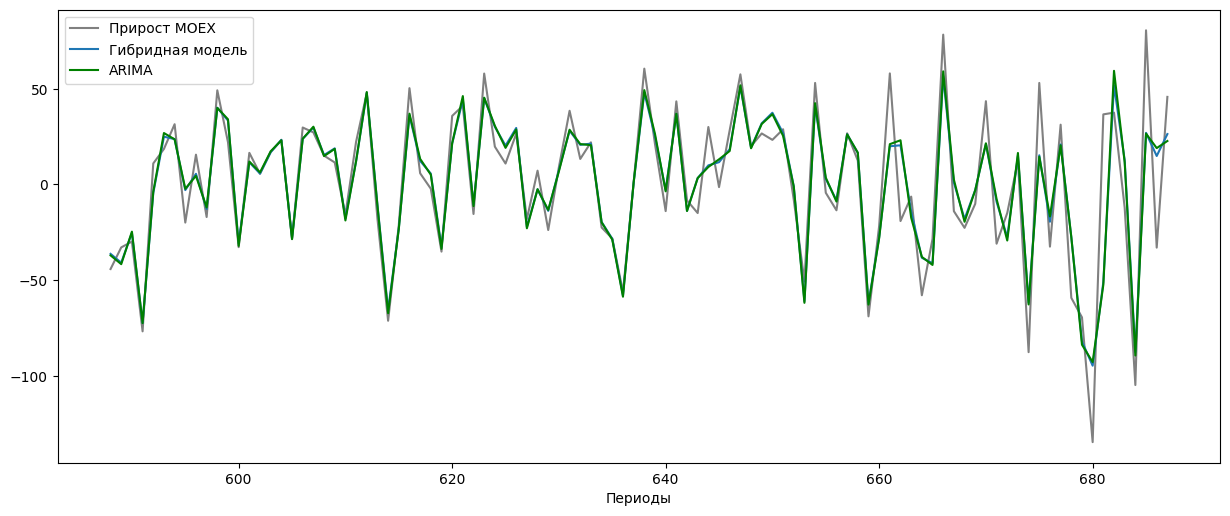

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['MOEX'][-100:].plot(label='Прирост MOEX', color = 'gray')
df['HYBRID'][-100:].plot(label='Гибридная модель')
df['ARIMA'][-100:].plot(label='ARIMA', color = 'green')
  
# adding Label to the x-axis
plt.xlabel('Периоды')
  
# adding legend to the curve
plt.legend()

In [ ]:
yyy = dataset['CLOSE'][-689:]

In [ ]:
yyy

2766    2470.61
2767    2457.79
2768    2476.73
2769    2483.70
2770    2493.28
         ...   
3450    3947.82
3451    3843.05
3452    3923.58
3453    3890.59
3454    3936.34
Name: CLOSE, Length: 689, dtype: float64

In [ ]:
Y_test_ = Y_test.diff()[3:]

In [ ]:
Y_test_

2767    -12.82
2768     18.94
2769      6.97
2770      9.58
2771     10.95
         ...  
3450    -12.11
3451   -104.77
3452     80.53
3453    -32.99
3454     45.75
Name: CLOSE, Length: 688, dtype: float64

In [ ]:
y_pred = np.diff(np.array(predictions_rolling[2:]).reshape(-1)+np.array(pred_svr).reshape(-1))

In [ ]:
y_pred.shape

(688,)

In [ ]:
profit = 0
profit_hist = []
profitability = 0
profitability_hist = []
for i in range(688):
  if y_pred[i] > 0:
    profit += Y_test_[i+2767]
    profit_hist.append(profit)
    profitability += Y_test_[i+2767]/yyy[2766+i]
    profitability_hist.append(Y_test_[i+2767]/yyy[2766+i])
  if y_pred[i] < 0:
    profit -= Y_test_[i+2767]
    profit_hist.append(profit)
    profitability -= Y_test_[i+2767]/yyy[2766+i]
    profitability_hist.append(Y_test_[i+2767]/yyy[2766+i])

In [ ]:
profitability

5.22933308483403

In [ ]:
y_pred_a = np.diff(np.array(predictions_rolling[2:]).reshape(-1))

In [ ]:
y_pred_a.shape

(688,)

In [ ]:
profit_a = 0
profit_hist_a = []
profitability_a = 0
profitability_hist_a = []
for i in range(688):
  if y_pred_a[i] > 0:
    profit_a += Y_test_[i+2767]
    profit_hist_a.append(profit_a)
    profitability_a += Y_test_[i+2767]/yyy[2766+i]
    profitability_hist_a.append(profitability_a)
  if y_pred_a[i] < 0:
    profit_a -= Y_test_[i+2767]
    profit_hist_a.append(profit_a)
    profitability_a -= Y_test_[i+2767]/yyy[2766+i]
    profitability_hist_a.append(profitability_a)

In [ ]:
profitability_a

5.22495692055468

In [ ]:
profits = pd.DataFrame()

In [ ]:
profit_svr = pd.read_csv('profit_svr.csv')

In [ ]:
profit_svr = profit_svr['0']

In [ ]:
profit_svr = profit_svr[3:]

In [ ]:
profits['SVR'] = profit_svr.reset_index(drop=True)

In [ ]:
profits['HYBRID'] = profitability_hist

In [ ]:
profits['ARIMA'] = profitability_hist_a

In [ ]:
profits['MOEX'] = dataset['CLOSE'][-688:].reset_index(drop=True)

In [ ]:
profits['LSTM'] = prof_lstm['0'][1:]

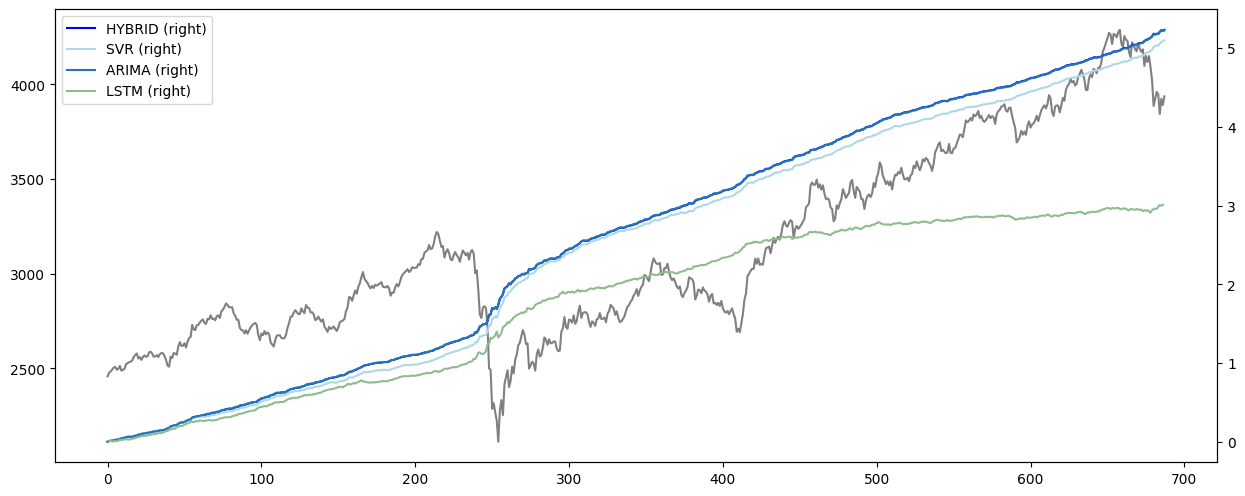

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
profits['HYBRID'].plot(label='HYBRID', color='blue', secondary_y=True)
profits['SVR'].plot(label='SVR', color='lightblue', secondary_y=True)
profits['ARIMA'].plot(label='ARIMA', secondary_y=True)
profits['LSTM'].plot(label='LSTM', color='darkseagreen', secondary_y=True)
profits['MOEX'].plot(label='MOEX', color = 'gray')

  
# adding Label to the x-axis
plt.xlabel('Периоды')
  
# adding legend to the curve
plt.legend()

plt.show()

In [ ]:
profits.to_csv('profits_all.csv')

In [ ]:
profit_l

NameError: ignored

In [ ]:
res_lstm = pd.read_csv('res_lstm_checked_day.csv')

In [ ]:
df1 = pd.DataFrame()

In [ ]:
df1['LSTM'] = res_lstm['0']
df1['MOEX'] = Y_test_[1:].reset_index(drop=True)

In [ ]:
df1

,LSTM,MOEX
0,20.103535,18.94
1,14.913623,6.97
2,4.840059,9.58
3,-11.213604,10.95
4,-14.136045,3.58
...,...,...
682,46.740166,-12.11
683,-66.431689,-104.77
684,60.551191,80.53
685,18.366367,-32.99


In [ ]:
r2_score(df1['MOEX'][:100],df1['LSTM'][:100])

0.4529915688852322

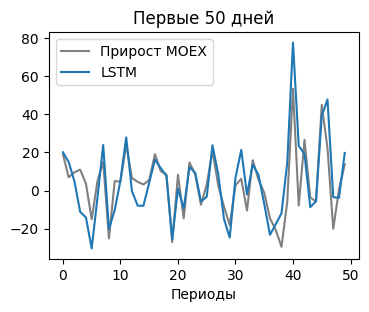

In [ ]:
plt.figure(figsize=(4, 3), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df1['MOEX'][:50].plot(label='Прирост MOEX', color = 'gray')
df1['LSTM'][:50].plot(label='LSTM')

# adding Label to the x-axis
plt.xlabel('Периоды')
plt.title('Первые 50 дней')
# adding legend to the curve
plt.legend()

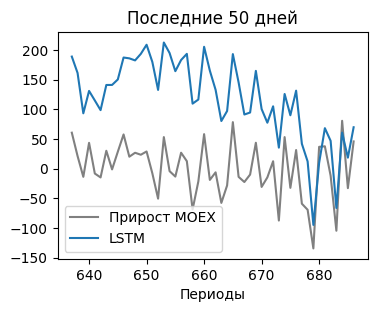

In [ ]:
plt.figure(figsize=(4, 3), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df1['MOEX'][-50:].plot(label='Прирост MOEX', color = 'gray')
df1['LSTM'][-50:].plot(label='LSTM')

# adding Label to the x-axis
plt.xlabel('Периоды')
plt.title('Последние 50 дней')

# adding legend to the curve
plt.legend()

In [ ]:
prof_lstm = pd.read_csv('profit_l.csv')

In [ ]:
rf = pd.read_csv('zcyc_range_calculator.csv', sep=';')

In [ ]:
np.mean(profitability_hist)

0.0007478551614747502

In [ ]:
np.std(profitability_hist)

0.011850160844017084

In [ ]:
(np.mean(profitability_hist*100) - 0.0814)/np.std(profitability_hist*100)

-6.805995791968086

(array([  2.,   0.,   0.,   0.,   3.,   1.,   6.,  11.,  49., 173., 224.,
        159.,  47.,   6.,   4.,   1.,   0.,   0.,   0.,   2.]),
 array([-0.08282789, -0.07482735, -0.0668268 , -0.05882625, -0.0508257 ,
        -0.04282516, -0.03482461, -0.02682406, -0.01882352, -0.01082297,
        -0.00282242,  0.00517813,  0.01317867,  0.02117922,  0.02917977,
         0.03718031,  0.04518086,  0.05318141,  0.06118196,  0.0691825 ,
         0.07718305]),
 <a list of 20 Patch objects>)

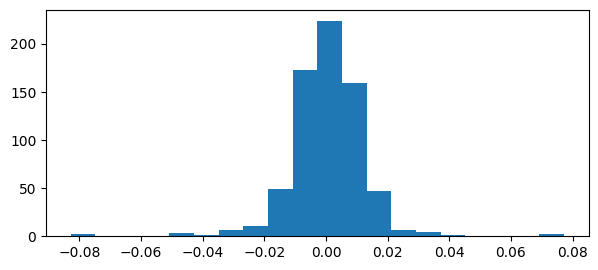

In [ ]:
plt.figure(figsize=(7, 3), dpi=100)

plt.hist(profitability_hist, bins = 20)